In [18]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"
import helpers.hp_tuning

%run "$imports_path"

In [20]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [21]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "tabGAN-qtr"

In [22]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=7)
    curr_image_dir = os.path.join(const.dir.images_hp_v7(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v7(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v7(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/210 [00:00<?, ?it/s]

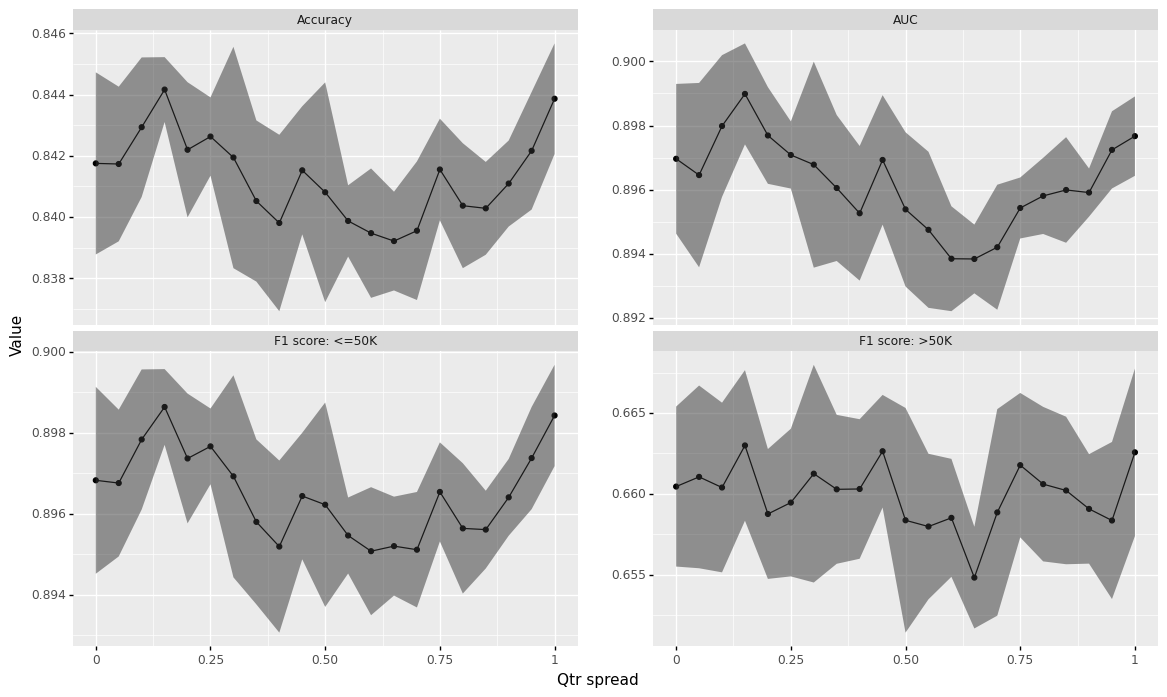

In [6]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [7]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.841753,0.896964,0.778639,0.896826,0.660452,0.002974,0.002334,0.003119,0.002312,0.004953
1,0.05,0.841733,0.896455,0.778905,0.896758,0.661051,0.002525,0.002873,0.003406,0.001815,0.005657
2,0.10,0.842935,0.897985,0.779114,0.897835,0.660393,0.002278,0.002209,0.002988,0.001733,0.005252
3,0.15,0.844163,0.898986,0.780819,0.898640,0.662998,0.001059,0.001574,0.002227,0.000937,0.004661
4,0.20,0.842198,0.897691,0.778061,0.897366,0.658756,0.002206,0.001507,0.002617,0.001605,0.004021
5,0.25,0.842629,0.897083,0.778563,0.897665,0.659461,0.001279,0.001047,0.002409,0.000937,0.004570
6,0.30,0.841946,0.896781,0.779087,0.896924,0.661250,0.003614,0.003211,0.004529,0.002498,0.006739
7,0.35,0.840525,0.896053,0.778039,0.895797,0.660281,0.002631,0.002275,0.002862,0.002040,0.004611
8,0.40,0.839807,0.895265,0.777745,0.895187,0.660303,0.002880,0.002098,0.003065,0.002128,0.004320
9,0.45,0.841527,0.896928,0.779539,0.896437,0.662640,0.002092,0.002018,0.002310,0.001565,0.003487


  0%|          | 0/50 [00:00<?, ?it/s]

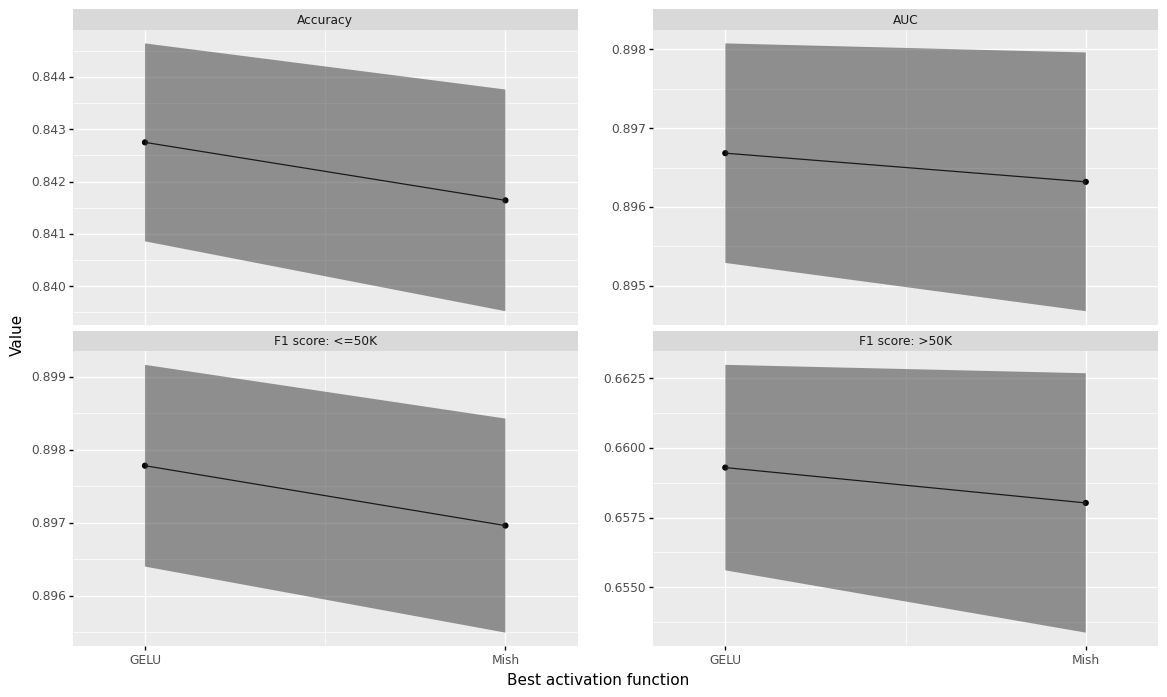

In [8]:
result_best_activation_function = plot_hp_tuning("best_activation_function")

In [9]:
result_best_activation_function

,Best activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,GELU,0.842749,0.896683,0.778538,0.897783,0.659292,0.001890,0.001394,0.002311,0.001384,0.003686
1,Mish,0.841641,0.896319,0.777493,0.896962,0.658024,0.002117,0.001643,0.002893,0.001468,0.004653


  0%|          | 0/250 [00:00<?, ?it/s]

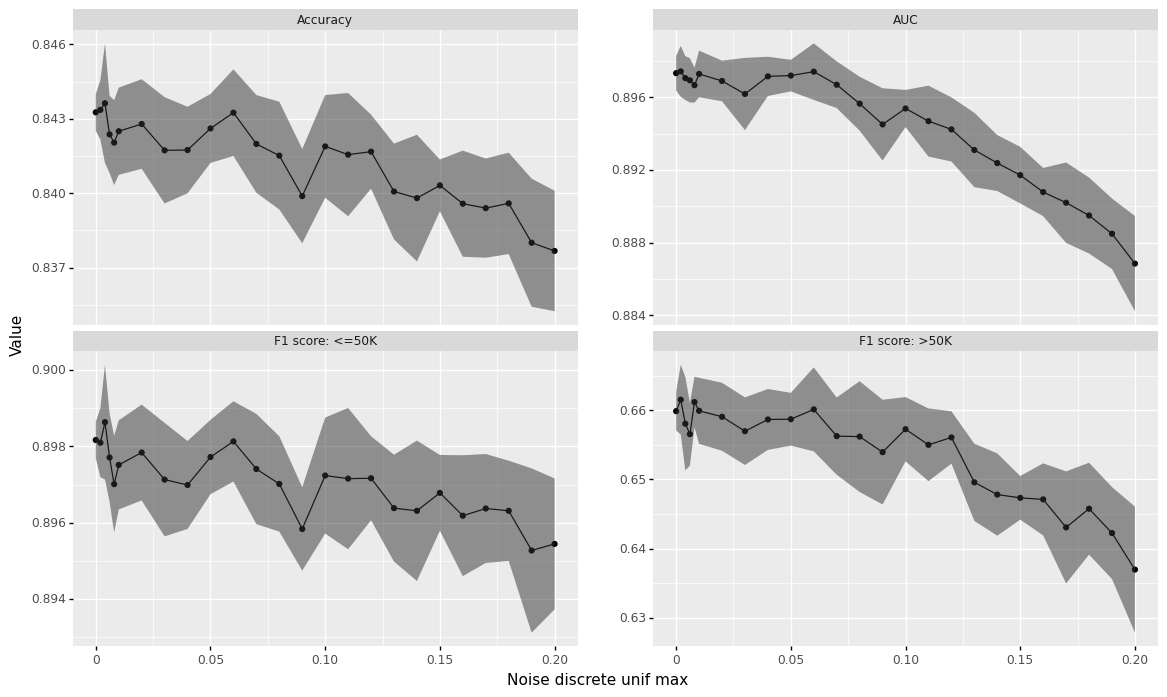

In [10]:
result_noise_discrete_unif_max = plot_hp_tuning("noise_discrete_unif_max")

  0%|          | 0/240 [00:00<?, ?it/s]

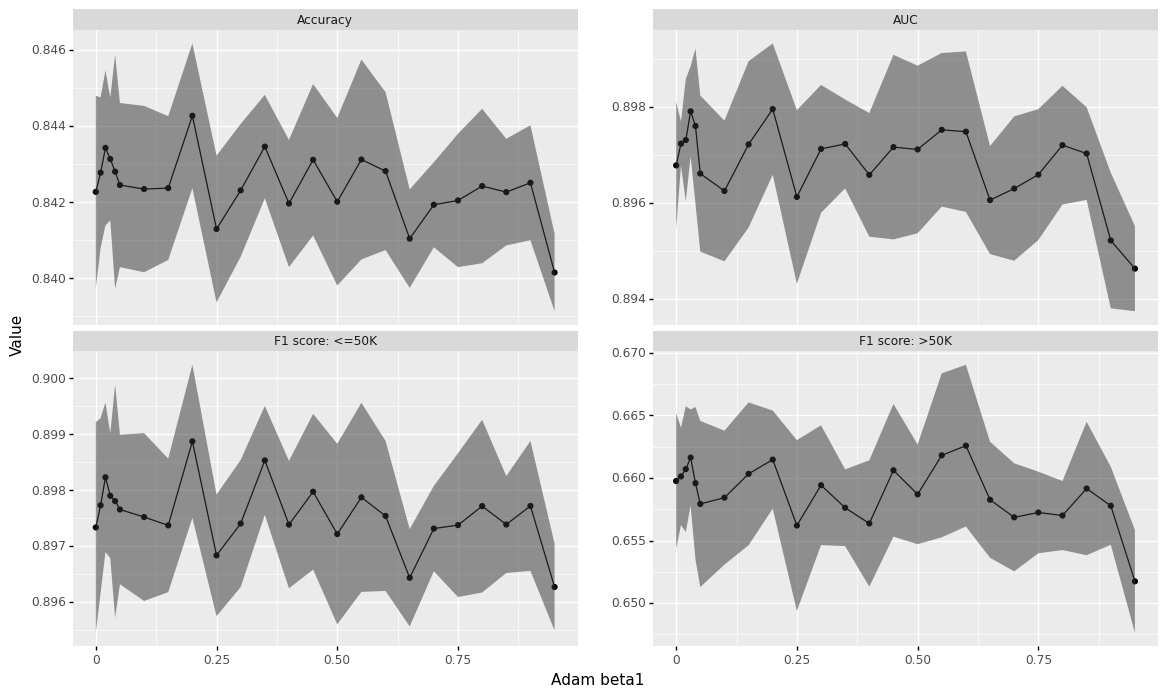

In [12]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

In [13]:
result_adam_beta1

,Adam beta1,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00001,0.842271,0.896781,0.778540,0.897333,0.659748,0.002522,0.001324,0.003219,0.001883,0.005420
1,0.01000,0.842776,0.897234,0.778923,0.897728,0.660117,0.001978,0.000461,0.002259,0.001560,0.003889
2,0.02000,0.843426,0.897309,0.779466,0.898230,0.660702,0.002035,0.001275,0.003070,0.001340,0.005025
3,0.03000,0.843134,0.897907,0.779761,0.897900,0.661622,0.001616,0.000937,0.002321,0.001115,0.003837
4,0.04000,0.842802,0.897602,0.778690,0.897804,0.659577,0.003073,0.001615,0.004017,0.002088,0.006086
5,0.05000,0.842450,0.896611,0.777787,0.897653,0.657920,0.002155,0.001626,0.003835,0.001338,0.006635
6,0.10000,0.842344,0.896249,0.777971,0.897519,0.658423,0.002185,0.001464,0.003210,0.001502,0.005348
7,0.15000,0.842371,0.897219,0.778847,0.897369,0.660324,0.001889,0.001731,0.003297,0.001195,0.005703
8,0.20000,0.844270,0.897954,0.780166,0.898873,0.661460,0.001901,0.001368,0.002433,0.001370,0.003919
9,0.25000,0.841295,0.896125,0.776514,0.896833,0.656196,0.001927,0.001808,0.003868,0.001088,0.006820


  0%|          | 0/200 [00:00<?, ?it/s]

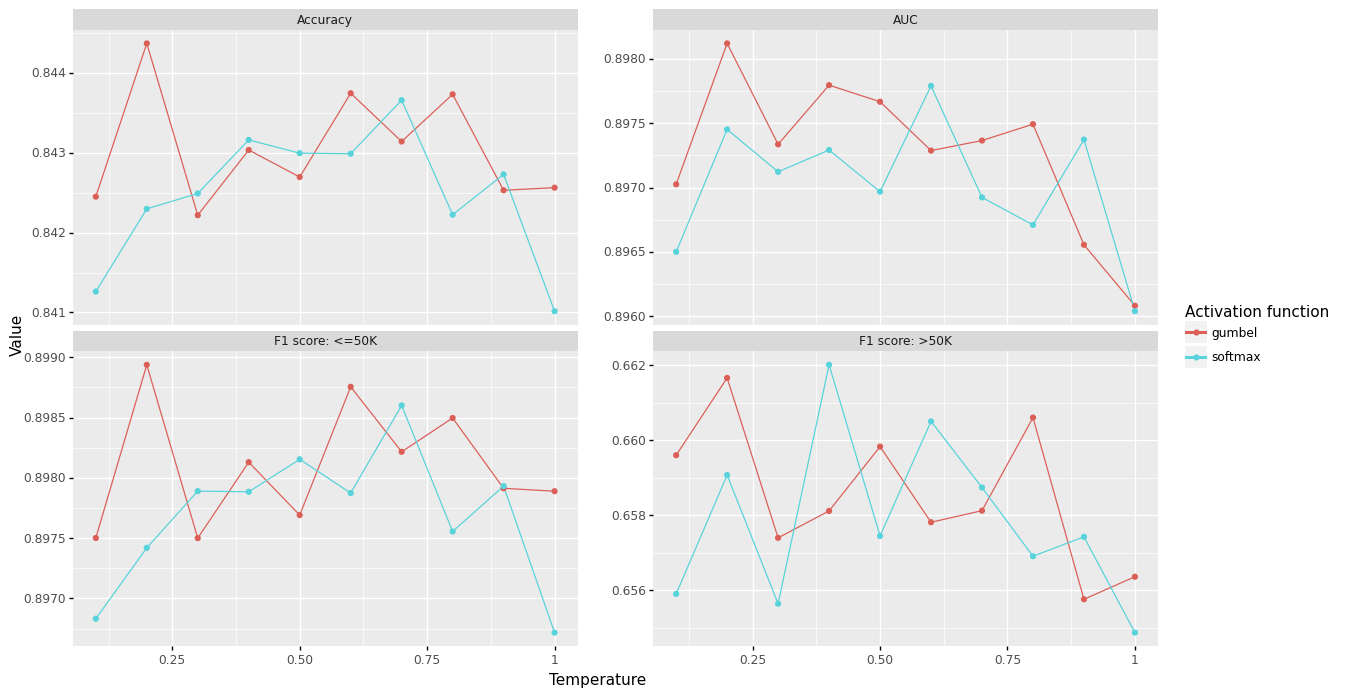

In [14]:
result_oh_encoding = plot_hp_tuning("oh_encoding")

  0%|          | 0/75 [00:00<?, ?it/s]

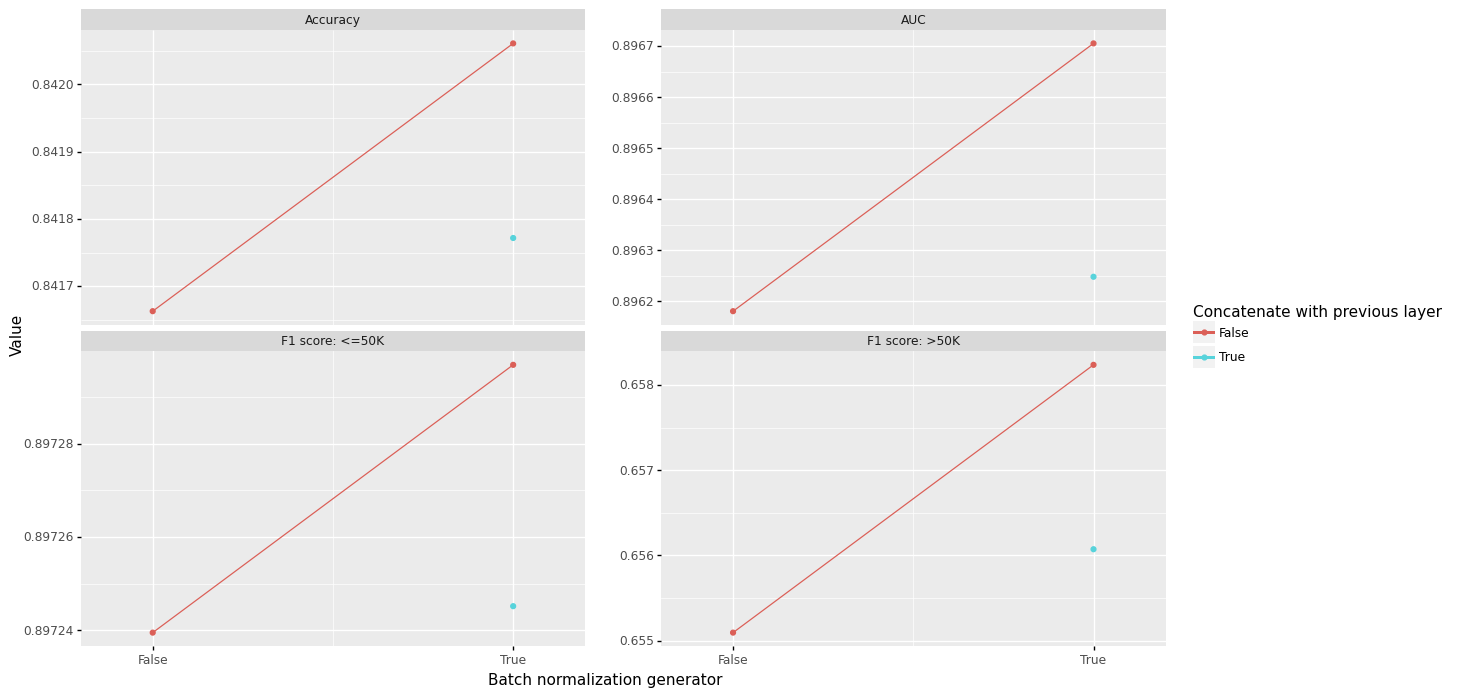

In [17]:
result_BN = plot_hp_tuning("BN")

In [16]:
result_BN

,Batch normalization generator,Concatenate with previous layer,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.842105,0.896927,0.777620,0.897364,0.657877,0.001556,0.001296,0.002605,0.001162,0.004849
1,True,False,0.842151,0.897286,0.777838,0.897367,0.658309,0.001753,0.001459,0.002598,0.001222,0.004413
2,True,True,0.841620,0.896132,0.776881,0.897065,0.656698,0.001718,0.000977,0.002395,0.001182,0.003874


  0%|          | 0/75 [00:00<?, ?it/s]

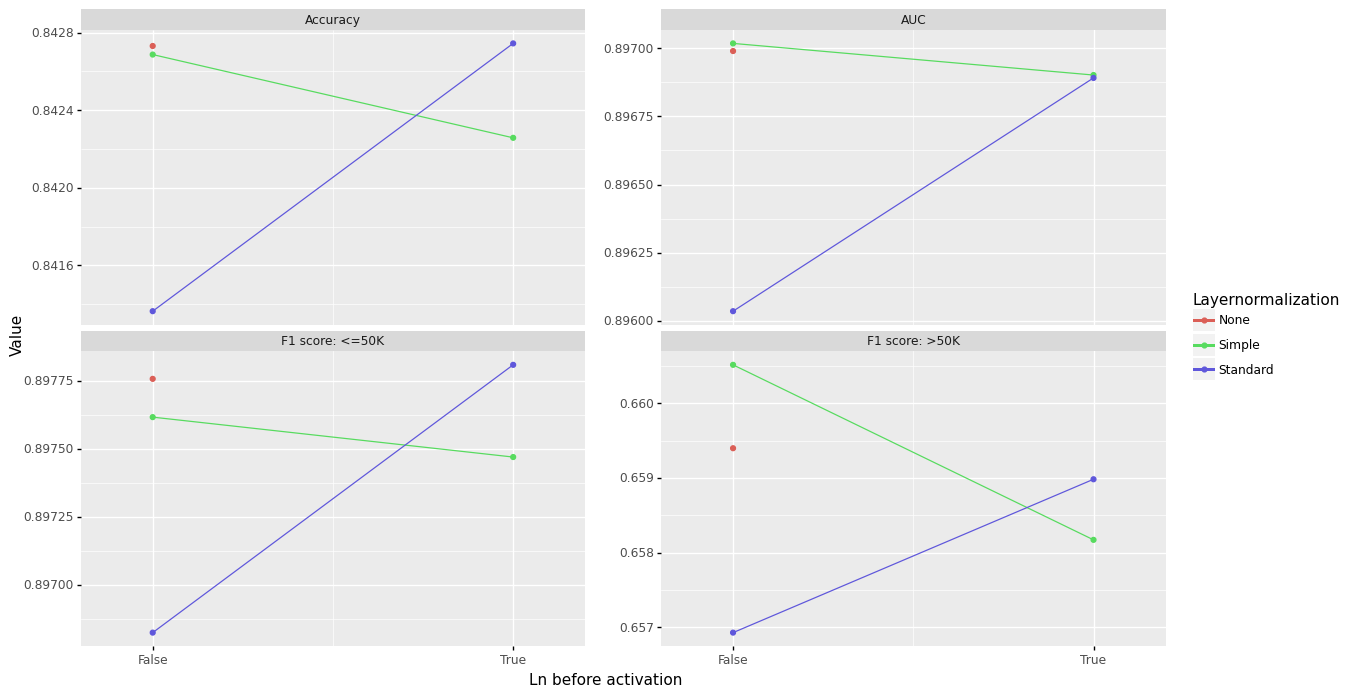

In [23]:
result_LN_advanced = plot_hp_tuning("LN_advanced")